In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

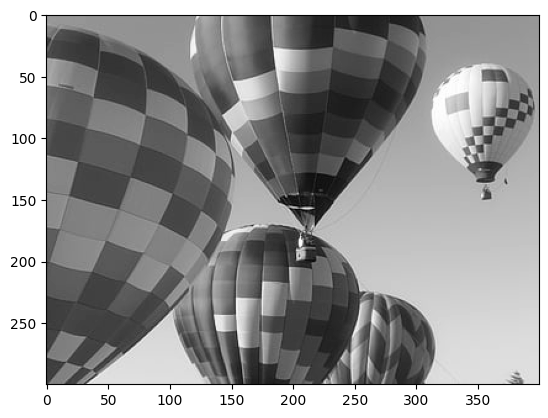

In [2]:
image = cv2.imread('./Lab 1.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


plt.imshow(gray_image, cmap='gray')
plt.show()


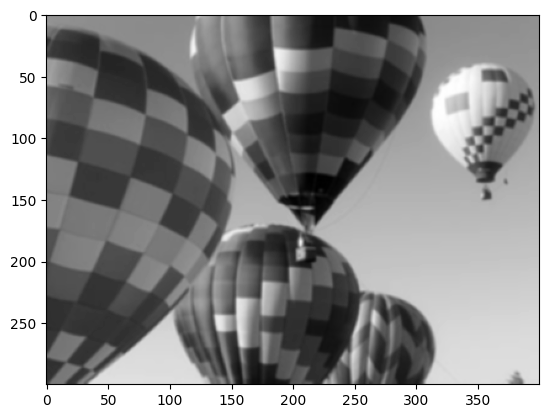

In [3]:
# Apply Gaussian filter to reduce noise
blurred_image = cv2.GaussianBlur(gray_image, (5,5), 0)

plt.imshow(blurred_image, cmap='gray')
plt.show()


In [4]:
# Calculate Sobel gradients
sobel_x = cv2.Sobel(blurred_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(blurred_image, cv2.CV_64F, 0, 1, ksize=3)

# Calculate gradient magnitude
G = np.sqrt(sobel_x**2 + sobel_y**2)

# Calculate gradient direction
theta = np.arctan2(sobel_y, sobel_x)

# Convert angles from radians to degrees
angle_degrees = theta * 180 / np.pi

# Round angles to 0, 45, 90, or 135 degrees
angle_degrees = ((angle_degrees + 180) % 180)
angle_degrees = np.round(angle_degrees / 45) * 45

print("Gradient magnitude shape:", G.shape)
print("Gradient direction shape:", angle_degrees.shape)


print("Gradient magnitude: ", G)
print("Gradient direction: ", angle_degrees)

Gradient magnitude shape: (300, 400)
Gradient direction shape: (300, 400)
Gradient magnitude:  [[  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...   4.           4.
    4.        ]
 [  0.           0.           0.         ...   8.           8.
    8.        ]
 ...
 [ 18.          64.63745044 131.40015221 ...   0.           0.
    0.        ]
 [ 22.          94.5409964  156.58863305 ...   0.           0.
    0.        ]
 [  0.         102.         156.         ...   0.           0.
    0.        ]]
Gradient direction:  [[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ... 90. 90. 90.]
 [ 0.  0.  0. ... 90. 90. 90.]
 ...
 [90. 45. 45. ...  0.  0.  0.]
 [90. 45. 45. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]


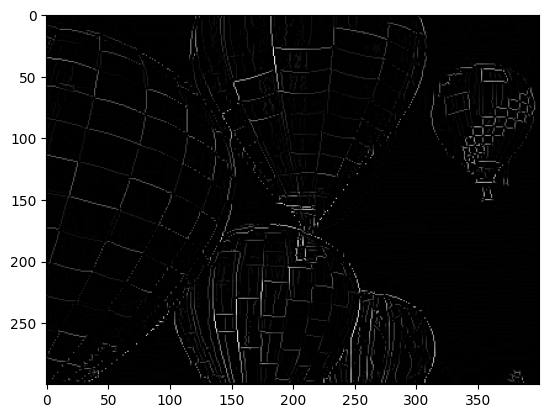

In [5]:
# Non-Max Suppression
M, N = G.shape
Z = np.zeros((M, N), dtype=np.float32)

for i in range(1, M-1):
    for j in range(1, N-1):
        try:
            q = 255
            r = 255
            
            # Angle 0
            if (0 <= angle_degrees[i, j] < 22.5) or (157.5 <= angle_degrees[i, j] <= 180):
                q = G[i, j+1]
                r = G[i, j-1]
            # Angle 45
            elif 22.5 <= angle_degrees[i, j] < 67.5:
                q = G[i+1, j-1]
                r = G[i-1, j+1]
            # Angle 90
            elif 67.5 <= angle_degrees[i, j] < 112.5:
                q = G[i+1, j]
                r = G[i-1, j]
            # Angle 135
            elif 112.5 <= angle_degrees[i, j] < 157.5:
                q = G[i-1, j-1]
                r = G[i+1, j+1]

            if (G[i, j] >= q) and (G[i, j] >= r):
                Z[i, j] = G[i, j]
            else:
                Z[i, j] = 0

        except IndexError as e:
            pass

plt.imshow(Z, cmap='gray')
plt.show()


Max value before Double Thresholding 497.6103
Min value before Double Thresholding 0.0


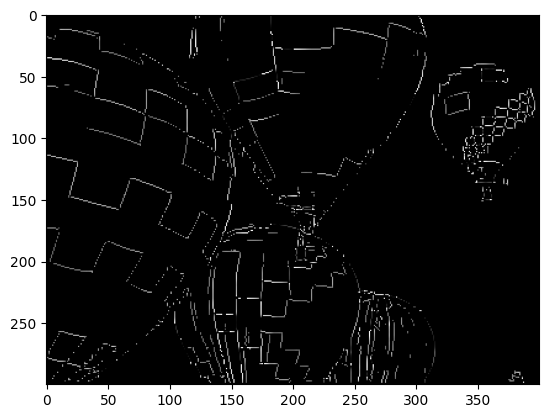

Max value after Double Thresholding 255
Min value after Double Thresholding 0


In [6]:
# Double Thresholding
print("Max value before Double Thresholding", Z.max())
print("Min value before Double Thresholding", Z.min())

lowerVal = 100
upperVal = 200

dt_image = np.zeros((M, N), dtype=np.uint8)

for i in range(M):
    for j in range(N):
        if Z[i, j] < lowerVal:
            dt_image[i, j] = 0
        elif Z[i, j] >= lowerVal:
            dt_image[i, j] = Z[i, j]

plt.imshow(dt_image, cmap='gray')
plt.show()

print("Max value after Double Thresholding", dt_image.max())
print("Min value after Double Thresholding", dt_image.min())


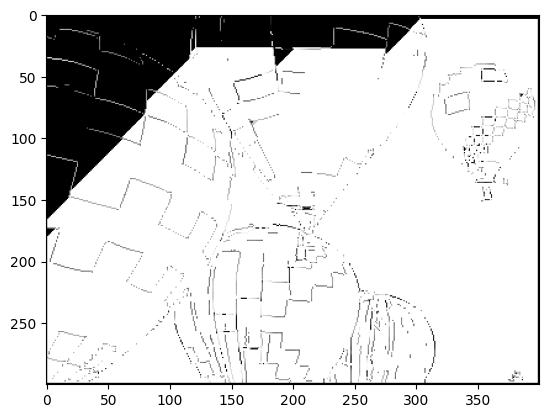

In [10]:
# Hysteresis
strong = 200
weak = 0

for i in range(1, M-1):
    for j in range(1, N-1):
        if dt_image[i, j] == weak:
            if ((dt_image[i+1, j-1] == strong) or (dt_image[i+1, j] == strong) or (dt_image[i+1, j+1] == strong)
                or (dt_image[i, j-1] == strong) or (dt_image[i, j+1] == strong)
                or (dt_image[i-1, j-1] == strong) or (dt_image[i-1, j] == strong) or (dt_image[i-1, j+1] == strong)):
                dt_image[i, j] = strong
            else:
                dt_image[i, j] = 0

plt.imshow(dt_image, cmap='gray')
plt.show()


In [8]:
dt_set = set(dt_image.flatten())
print(dt_set)


{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 93, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 22

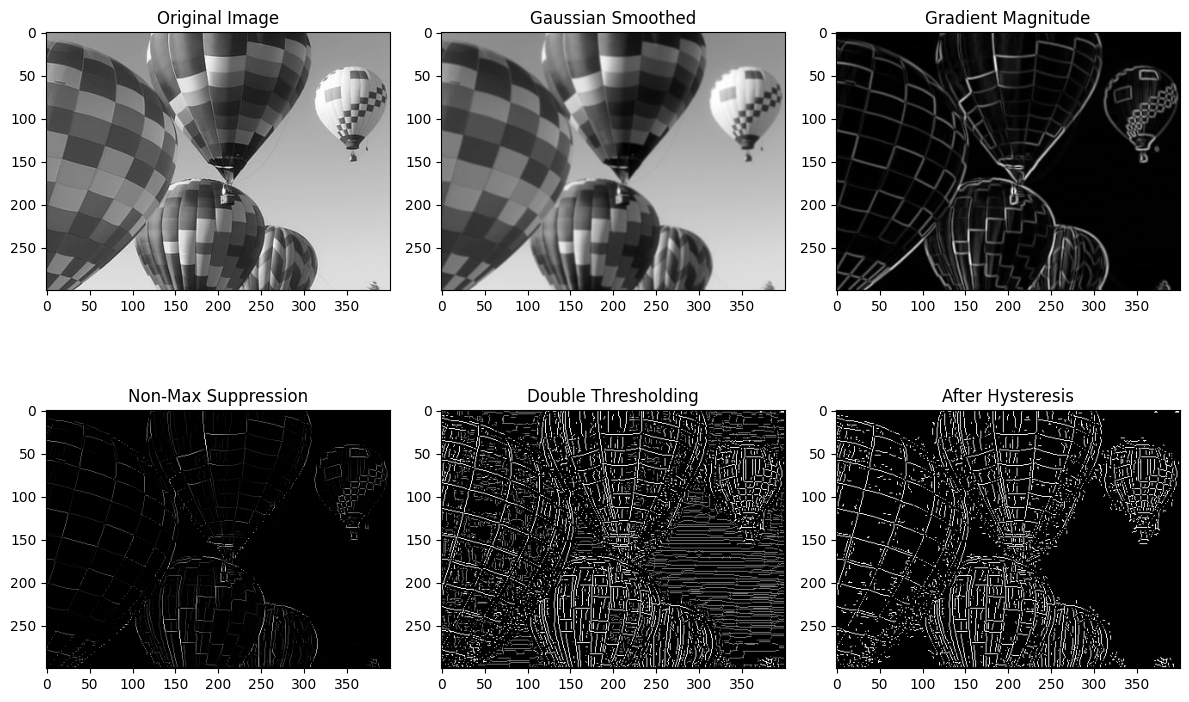

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

# Create a 5x5 Gaussian kernel with σ=1.0
def create_gaussian_kernel(size=5, sigma=1.0):
    kernel = np.zeros((size, size))
    center = size // 2
    
    for i in range(size):
        for j in range(size):
            x = i - center
            y = j - center
            kernel[i, j] = (1/(2*np.pi*sigma**2)) * np.exp(-(x**2 + y**2)/(2*sigma**2))
    
    # Normalize the kernel
    kernel = kernel / kernel.sum()
    return kernel

# Custom convolution function
def convolve2d(image, kernel):
    kernel_height, kernel_width = kernel.shape
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2
    
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='edge')
    output = np.zeros_like(image, dtype=np.float64)
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            output[i, j] = np.sum(padded_image[i:i+kernel_height, j:j+kernel_width] * kernel)
    
    return output

# Read and convert image to grayscale
image = cv2.imread('./Lab 1.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(12, 8))
plt.subplot(231), plt.imshow(gray_image, cmap='gray'), plt.title('Original Image')

# Create and apply Gaussian kernel
gaussian_kernel = create_gaussian_kernel(5, 1.0)
blurred_image = convolve2d(gray_image, gaussian_kernel)

plt.subplot(232), plt.imshow(blurred_image, cmap='gray'), plt.title('Gaussian Smoothed')

# Define Sobel kernels
sobel_x_kernel = np.array([[-1, 0, 1],
                          [-2, 0, 2],
                          [-1, 0, 1]])

sobel_y_kernel = np.array([[-1, -2, -1],
                          [0, 0, 0],
                          [1, 2, 1]])

# Apply Sobel operators using custom convolution
Gx = convolve2d(blurred_image, sobel_x_kernel)
Gy = convolve2d(blurred_image, sobel_y_kernel)

# Calculate gradient magnitude and direction
G = np.sqrt(Gx**2 + Gy**2)
theta = np.arctan2(Gy, Gx)

plt.subplot(233), plt.imshow(G, cmap='gray'), plt.title('Gradient Magnitude')

# Convert angles to degrees and adjust to 4 directions
angle_degrees = np.rad2deg(theta) % 180
angle_degrees = np.round(angle_degrees / 45) * 45

# Non-Maximum Suppression
M, N = G.shape
Z = np.zeros((M, N), dtype=np.float32)

for i in range(1, M-1):
    for j in range(1, N-1):
        try:
            q = 255
            r = 255
            
            # Angle 0
            if (0 <= angle_degrees[i, j] < 22.5) or (157.5 <= angle_degrees[i, j] <= 180):
                q = G[i, j+1]
                r = G[i, j-1]
            # Angle 45
            elif 22.5 <= angle_degrees[i, j] < 67.5:
                q = G[i+1, j-1]
                r = G[i-1, j+1]
            # Angle 90
            elif 67.5 <= angle_degrees[i, j] < 112.5:
                q = G[i+1, j]
                r = G[i-1, j]
            # Angle 135
            elif 112.5 <= angle_degrees[i, j] < 157.5:
                q = G[i-1, j-1]
                r = G[i+1, j+1]

            if (G[i, j] >= q) and (G[i, j] >= r):
                Z[i, j] = G[i, j]
            else:
                Z[i, j] = 0

        except IndexError as e:
            pass

plt.subplot(234), plt.imshow(Z, cmap='gray'), plt.title('Non-Max Suppression')

# Double Thresholding
high_threshold = np.percentile(Z, 90)
low_threshold = high_threshold * 0.3

strong_edges = (Z > high_threshold)
weak_edges = (Z >= low_threshold) & (Z <= high_threshold)
non_edges = (Z < low_threshold)

edges = np.zeros_like(Z, dtype=np.uint8)
edges[strong_edges] = 255
edges[weak_edges] = 128

plt.subplot(235), plt.imshow(edges, cmap='gray'), plt.title('Double Thresholding')

# Hysteresis
final_edges = np.copy(edges)
M, N = edges.shape

for i in range(1, M-1):
    for j in range(1, N-1):
        if edges[i, j] == 128:
            if 255 in [edges[i+1, j-1], edges[i+1, j], edges[i+1, j+1],
                      edges[i, j-1], edges[i, j+1],
                      edges[i-1, j-1], edges[i-1, j], edges[i-1, j+1]]:
                final_edges[i, j] = 255
            else:
                final_edges[i, j] = 0

plt.subplot(236), plt.imshow(final_edges, cmap='gray'), plt.title('After Hysteresis')
plt.tight_layout()
plt.show()


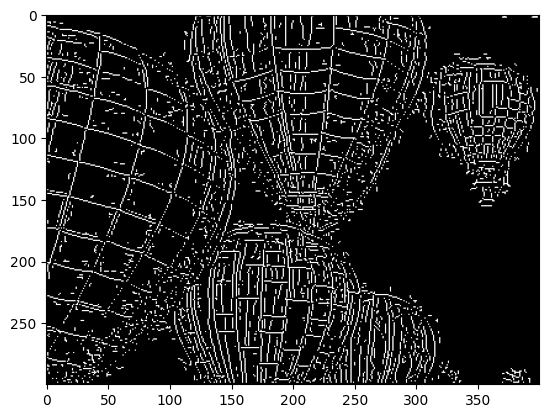

In [12]:
plt.imshow(final_edges, cmap='gray')
plt.show()


## TODO: 

Implement and apply the following edge operators on an input image and interpret the results.

- Prewitt Operator
- Sobel Operator
- Robinson Compass Masks
- Kirsch Compass Masks
- Laplacian Operator

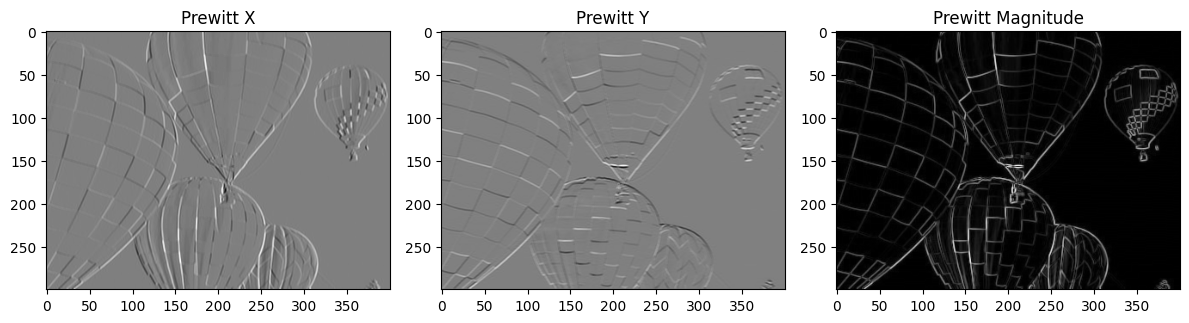

In [13]:
# Implementing Prewitt Operator

prewitt_x = np.array([[-1, 0, 1],
                      [-1, 0, 1],
                      [-1, 0, 1]])

prewitt_y = np.array([[-1, -1, -1],
                      [0, 0, 0],
                      [1, 1, 1]])


# Apply Prewitt operators using custom convolution
prewitt_x_output = convolve2d(gray_image, prewitt_x)
prewitt_y_output = convolve2d(gray_image, prewitt_y)

# Calculate gradient magnitude
prewitt_magnitude = np.sqrt(prewitt_x_output**2 + prewitt_y_output**2)

# Display results
plt.figure(figsize=(12, 4))
plt.subplot(131), plt.imshow(prewitt_x_output, cmap='gray'), plt.title('Prewitt X')
plt.subplot(132), plt.imshow(prewitt_y_output, cmap='gray'), plt.title('Prewitt Y') 
plt.subplot(133), plt.imshow(prewitt_magnitude, cmap='gray'), plt.title('Prewitt Magnitude')
plt.tight_layout()
plt.show()



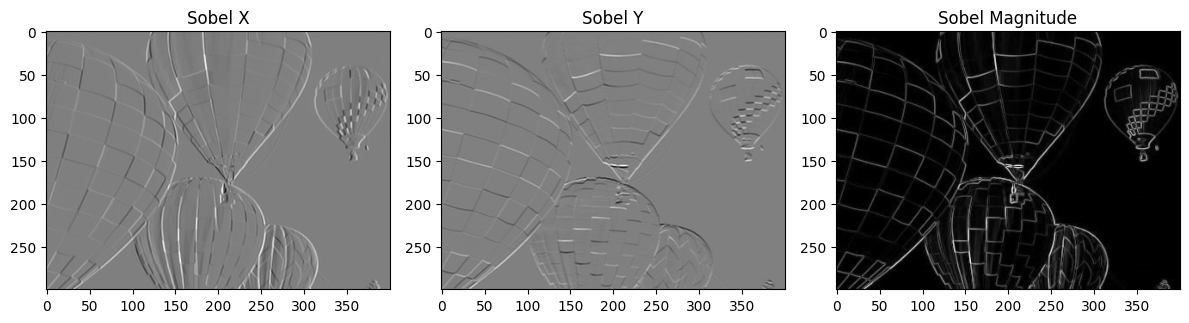

In [14]:
# Implementing Sobel Operator

sobel_x = np.array([[-1, 0, 1],
                      [-2, 0, 2],
                      [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1],
                      [0, 0, 0],
                      [1, 2, 1]])


# Apply Prewitt operators using custom convolution
sobel_x_output = convolve2d(gray_image, sobel_x)
sobel_y_output = convolve2d(gray_image, sobel_y)

# Calculate gradient magnitude
sobel_magnitude = np.sqrt(sobel_x_output**2 + sobel_y_output**2)

# Display results
plt.figure(figsize=(12, 4))
plt.subplot(131), plt.imshow(sobel_x_output, cmap='gray'), plt.title('Sobel X')
plt.subplot(132), plt.imshow(sobel_y_output, cmap='gray'), plt.title('Sobel Y') 
plt.subplot(133), plt.imshow(sobel_magnitude, cmap='gray'), plt.title('Sobel Magnitude')
plt.tight_layout()
plt.show()

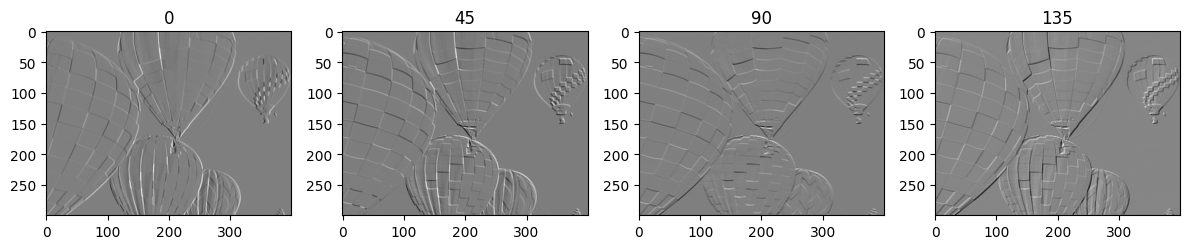

In [24]:
# Implementing Robinson Compass Masks

robin_compass_mask_0 = np.array([[-1, 0, 1],
                               [-2, 0, 2],
                               [-1, 0, 1]])

robin_compass_mask_45 = np.array([[0, 1, 2],
                               [-1, 0, 1],
                               [-2, -1, 0]])

robin_compass_mask_90 = np.array([[1, 2, 1],
                               [0, 0, 0],
                               [-1, -2, -1]])

robin_compass_mask_135 = np.array([[2, 1, 0],
                               [1, 0, -1],
                               [0, -1, -2]])

robin_compass_output_0 = convolve2d(gray_image, robin_compass_mask_0)
robin_compass_output_45 = convolve2d(gray_image, robin_compass_mask_45)
robin_compass_output_90 = convolve2d(gray_image, robin_compass_mask_90)
robin_compass_output_135 = convolve2d(gray_image, robin_compass_mask_135)

plt.figure(figsize=(12, 4))
plt.subplot(141), plt.imshow(robin_compass_output_0, cmap='gray'), plt.title('0')
plt.subplot(142), plt.imshow(robin_compass_output_45, cmap='gray'), plt.title('45')
plt.subplot(143), plt.imshow(robin_compass_output_90, cmap='gray'), plt.title('90')
plt.subplot(144), plt.imshow(robin_compass_output_135, cmap='gray'), plt.title('135')
plt.tight_layout()

plt.show()


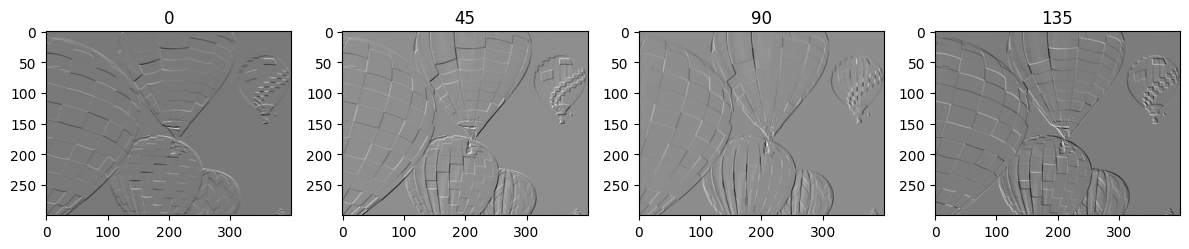

In [25]:
# Implementing Kirsch Compass Masks
kirsch_compass_mask_0 = np.array([[5, 5, 5],
                               [-3, 0, -3],
                               [-3, -3, -3]])

kirsch_compass_mask_45 = np.array([[5, 5, -3],
                               [5, 0, -3],
                               [-3, -3, -3]])

kirsch_compass_mask_90 = np.array([[5, -3, -3],
                               [5, 0, -3],
                               [5, -3, -3]])

kirsch_compass_mask_135 = np.array([[-3, -3, -3],
                               [5, 0, -3],
                               [5, 5, -3]])

kirsch_compass_output_0 = convolve2d(gray_image, kirsch_compass_mask_0)
kirsch_compass_output_45 = convolve2d(gray_image, kirsch_compass_mask_45)
kirsch_compass_output_90 = convolve2d(gray_image, kirsch_compass_mask_90)
kirsch_compass_output_135 = convolve2d(gray_image, kirsch_compass_mask_135)

plt.figure(figsize=(12, 4))
plt.subplot(141), plt.imshow(kirsch_compass_output_0, cmap='gray'), plt.title('0')
plt.subplot(142), plt.imshow(kirsch_compass_output_45, cmap='gray'), plt.title('45')
plt.subplot(143), plt.imshow(kirsch_compass_output_90, cmap='gray'), plt.title('90')
plt.subplot(144), plt.imshow(kirsch_compass_output_135, cmap='gray'), plt.title('135')
plt.tight_layout()


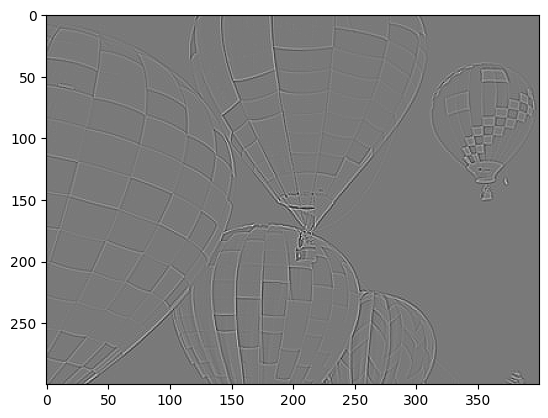

In [16]:
# Implmenting Laplacian Operator

laplacian_operator = np.array([[0, 1, 0],
                               [1, -4, 1],
                               [0, 1, 0]])

laplacian_output = convolve2d(gray_image, laplacian_operator)

plt.imshow(laplacian_output, cmap='gray')
plt.show()